In [2]:
import pandas as pd
import matplotlib.pyplot as plt



In [6]:
data =pd.read_csv("framingham.csv")
data.isnull().sum()


male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [22]:
#drop education since there's no clear documentation on the column
data.drop(['education'],axis=1,inplace=True)

In [13]:
#study the average of each column based on whether the person has a heart disease or not
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,4238.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,22.836603,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [9]:
#continuous features
#check whether glucose, BMI, Cigsperday, and totalChol are missing at random or not.
data.groupby(data['glucose'].isnull()).mean()
#since there isn't much difference between the two groups, we can assume that the missing values are missing at random.

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
glucose,,,,,,,,,,,,,,,,
False,0.442597,49.643896,1.976819,0.490649,8.978301,0.030008,0.006234,0.312727,0.027273,237.001302,132.449870,82.928831,25.810420,75.733437,81.966753,0.154286
True,0.296392,49.000000,2.000000,0.528351,9.250000,0.025907,0.002577,0.288660,0.010309,233.635057,131.385309,82.542526,25.717755,77.322165,NaN,0.128866


In [11]:
#fill using the mean
data['glucose'].fillna(data['glucose'].mean(),inplace=True)

In [10]:
#next is BMI
data.groupby(data['BMI'].isnull()).mean()
#there's a difference between the two groups, so we can't assume that the missing values are missing at random.

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
BMI,,,,,,,,,,,,,,,,
False,0.429960,49.575729,1.979101,0.494667,9.017900,0.029525,0.005452,0.310263,0.025361,236.775540,132.334676,82.904006,25.802008,75.877904,81.935349,0.150273
True,0.263158,51.631579,1.944444,0.368421,5.736842,0.052632,0.105263,0.368421,0.105263,224.222222,136.289474,80.552632,NaN,76.105263,90.571429,0.526316


In [15]:
#using (MICE) to fill the missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
data['BMI'] = imp.fit_transform(data[['BMI']])
data['BMI'].isnull().sum()

0

In [16]:
#next is Cigsperday
data.groupby(data['cigsPerDay'].isnull()).mean()
#there's a difference between the two groups, so we can't assume that the missing values are missing at random.

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
cigsPerDay,,,,,,,,,,,,,,,,
False,0.428843,49.586600,1.978568,0.490615,9.003089,0.029836,0.00594,0.311000,0.025897,236.671315,132.351152,82.887028,25.801686,75.865494,81.946361,0.152530
True,0.482759,49.344828,2.037037,1.000000,NaN,0.000000,0.00000,0.241379,0.000000,243.931034,132.534483,83.827586,25.848621,77.827586,84.926449,0.068966


In [17]:
#using (MICE) to fill the missing values
imp2 = IterativeImputer(max_iter=10, random_state=0)
data['cigsPerDay'] = imp2.fit_transform(data[['cigsPerDay']])
data['cigsPerDay'].isnull().sum()

0

In [19]:
#finally totalChol
data.groupby(data['totChol'].isnull()).mean()
#it's missing at random, so we can fill it using the mean

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
totChol,,,,,,,,,,,,,,,,
False,0.432665,49.562321,1.980901,0.492598,8.972323,0.029255,0.005969,0.310649,0.025788,236.721585,132.32235,82.891237,25.795768,75.85049,81.948527,0.151624
True,0.140000,51.480000,1.816327,0.620000,11.580000,0.061224,0.000000,0.300000,0.020000,NaN,134.87000,83.080000,26.324640,78.26000,83.493403,0.180000


In [24]:
data['totChol'].fillna(data['totChol'].mean(),inplace=True)
data['heartRate'].fillna(data['heartRate'].mean(),inplace=True)

In [25]:
data.isnull().sum()

male                0
age                 0
currentSmoker       0
cigsPerDay          0
BPMeds             53
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                 0
heartRate           0
glucose             0
TenYearCHD          0
dtype: int64

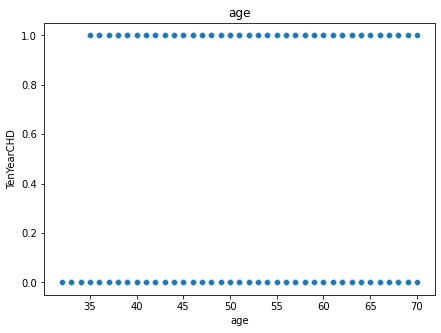

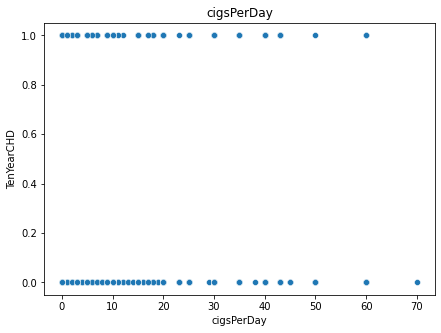

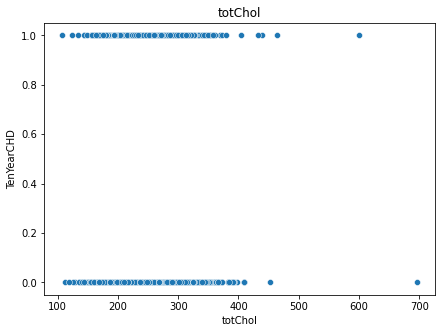

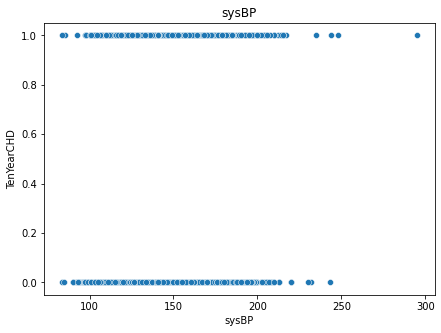

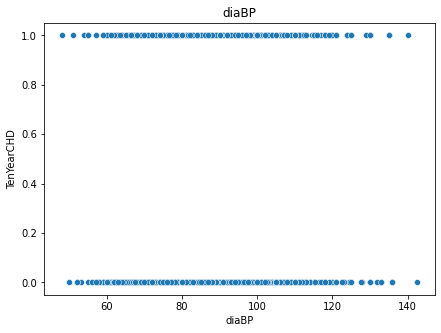

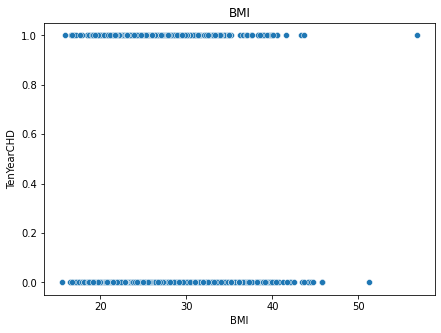

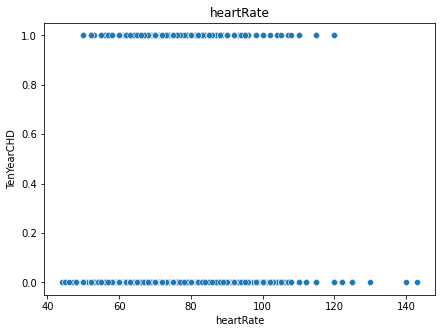

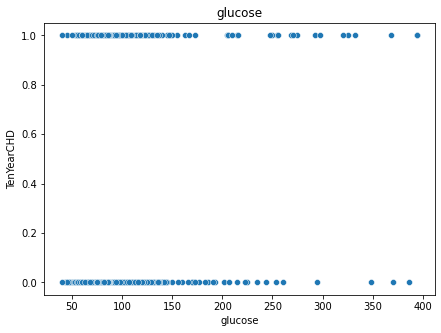

In [45]:
#plotting continuous features with respect to the target column
import seaborn as sns
cont_features = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']
for i in cont_features:
    plt.figure(figsize=(7,5))
    plt.title(i)
    sns.scatterplot(data = data, x = data[i], y = data['TenYearCHD'])
    plt.show()
#from the plots we can see that age, cigsPerDay, BMI, heartrate, and glucose are good indicators on whether


In [40]:
#studying missin categorical features
data.groupby(data['BPMeds'].isnull()).mean()
#missing at random, so we can fill it using the mean
data['BPMeds'].fillna(data['BPMeds'].mean(),inplace=True)



<Figure size 432x288 with 0 Axes>

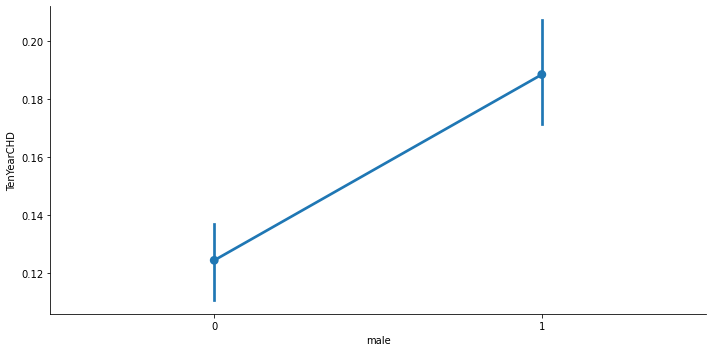

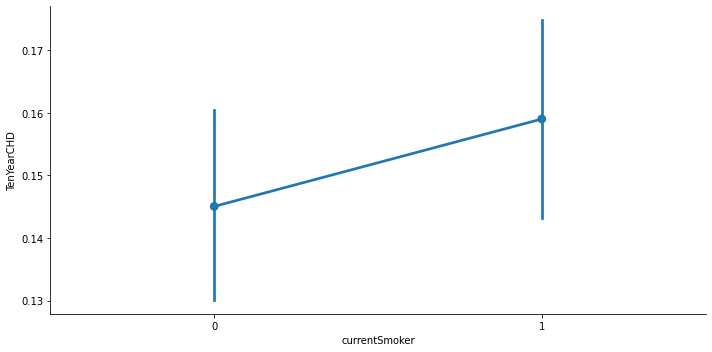

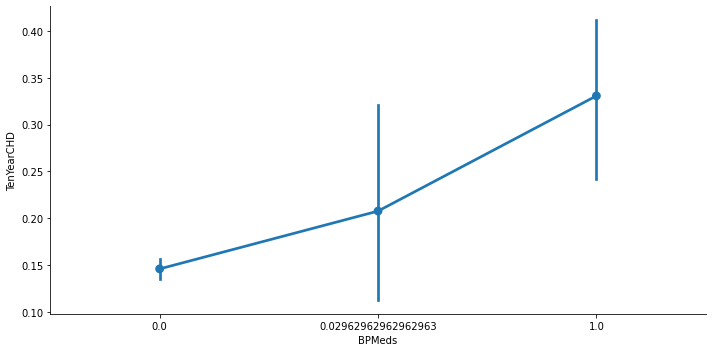

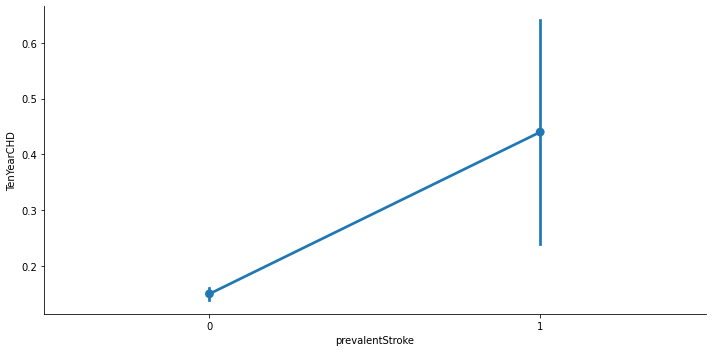

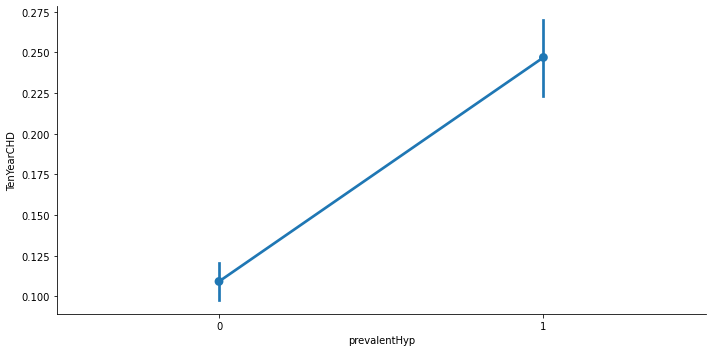

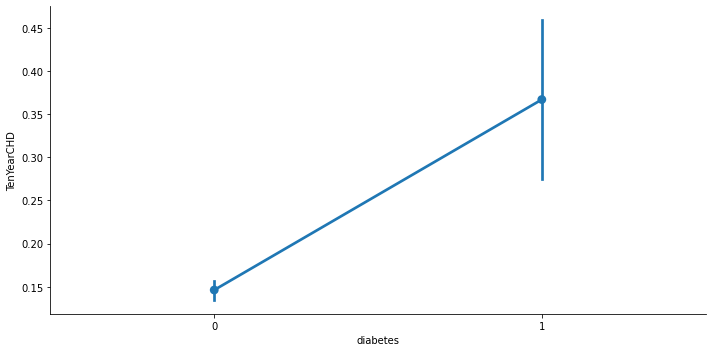

In [49]:
#plotting categorical features with respect to the target column
cat_features = ['male', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
for i , col in enumerate(cat_features):
    plt.figure(i)
    show = sns.catplot(x = col, y = 'TenYearCHD', data = data, kind = 'point', aspect = 2)
print(show)
#results show that previously having a stroke is a strong indicator on whether someone will have a heart disease or not in the next 10 years
#also, having diabetes is a strong indicator on whether someone will have a heart disease or not in the next 10 years
#we can't tell for sure with BPMeds, but a good number of people who take BPMeds have a heart disease in the next 10 years
#we can drop the "current smoker" and "male" columns since they're not strong indicators 

In [50]:
data.drop(['male', 'currentSmoker'], axis = 1, inplace = True)

In [51]:
#splitting the data into train and test and validation
from sklearn.model_selection import train_test_split
X = data.drop(['TenYearCHD'], axis = 1)
y = data['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 40)


In [52]:
#training the logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

c:\Users\User\Documents\python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
#finding training accuracy
logreg.score(X_train, y_train)

0.8477576711250984

In [54]:
#validating the model
logreg.score(X_val, y_val)

0.8502358490566038

In [55]:
#testing the model
logreg.score(X_test, y_test)

0.8419811320754716

In [59]:
logreg.predict(X_test)
#comparing to the actual values
compare = pd.DataFrame({'Actual': y_test, 'Predicted': logreg.predict(X_test)})
compare

,Actual,Predicted
3480,1,0
2761,0,0
70,0,0
3193,0,0
3329,0,0
...,...,...
2933,1,0
3221,0,0
3963,0,0
2704,0,0
